In [249]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [250]:
path = r"D:/Code/DATA-analysis\data-analysis/Pregame simulation/高钾风化筛选结果.xlsx"
df = pd.read_excel(path, sheet_name='Sheet1')  # 从Excel文件中加载数据，读取名为'表单1'的工作表

In [251]:
X = df.iloc[:, 1:].values

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)  # 也可以指定初始中心，默认是随机初始化中心

print('分类结果：', kmeans.labels_)
print('各类别中心：', kmeans.cluster_centers_)

分类结果： [0 1 1 1 0 0]
各类别中心： [[92.56666667  0.          0.24666667  1.22333333  0.39333333  2.66333333
   0.24        1.77666667  0.          0.          0.39333333  0.
   0.          0.        ]
 [95.36        0.          0.84        0.51666667  0.          1.19666667
   0.29        1.34666667  0.          0.          0.16666667  0.
   0.          0.        ]]


d:\Anaconda\envs\new_env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [252]:
kmeans.labels_

array([0, 1, 1, 1, 0, 0])

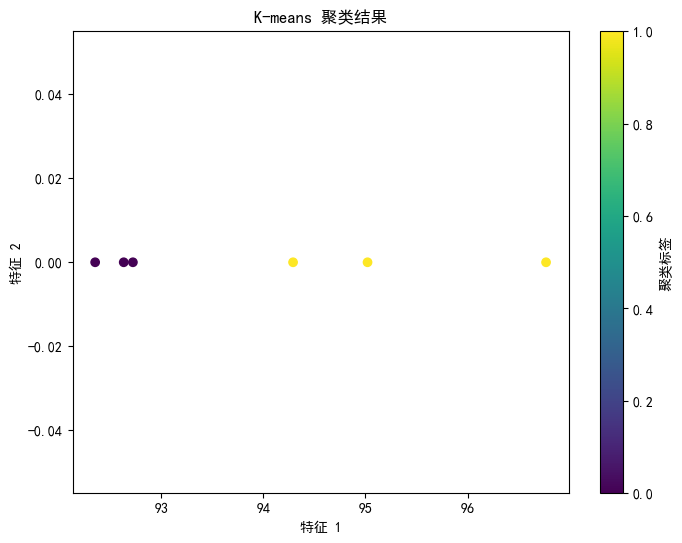

In [253]:
# 创建图形
plt.figure(figsize=(8, 6))

# 绘制散点图，使用颜色映射
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')

# 添加标题和标签
plt.title('K-means 聚类结果')
plt.xlabel('特征 1')
plt.ylabel('特征 2')

# 显示颜色条
plt.colorbar(label='聚类标签')

# 显示图形
plt.show()

In [254]:
# import matplotlib.pyplot as plt

# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X)
#     sse.append(kmeans.inertia_)

# plt.plot(range(1, 11), sse, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('SSE')
# plt.title('Elbow Method')
# plt.show()


In [255]:
kmeans.labels_

array([0, 1, 1, 1, 0, 0])

In [256]:
labels = kmeans.labels_

# 将数据和标签组合成DataFrame
df = pd.DataFrame(X, columns=[
    'SiO2', 'Na2O', 'K2O', 'CaO', 'MgO', 'Al2O3', 'Fe2O3', 'CuO', 'PbO', 'BaO', 
    'P2O5', 'SrO', 'SnO2', 'SO2'
])
df['标签'] = labels

# 计算每个特征在不同簇中的均值和该类别个数
cluster_summary = df.groupby('标签').agg({
    'SiO2': 'mean',
    'Na2O': 'mean',
    'K2O': 'mean',
    'CaO': 'mean',
    'MgO': 'mean',
    'Al2O3': 'mean',
    'Fe2O3': 'mean',
    'CuO': 'mean',
    'PbO': 'mean',
    'BaO': 'mean',
    'P2O5': 'mean',
    'SrO': 'mean',
    'SnO2': 'mean',
    'SO2': 'mean',
    '标签': 'count'
}).rename(columns={'标签': '该类别个数'})

print(cluster_summary)

         SiO2  Na2O       K2O       CaO       MgO     Al2O3  Fe2O3       CuO  \
标签                                                                             
0   92.566667   0.0  0.246667  1.223333  0.393333  2.663333   0.24  1.776667   
1   95.360000   0.0  0.840000  0.516667  0.000000  1.196667   0.29  1.346667   

    PbO  BaO      P2O5  SrO  SnO2  SO2  该类别个数  
标签                                             
0   0.0  0.0  0.393333  0.0   0.0  0.0      3  
1   0.0  0.0  0.166667  0.0   0.0  0.0      3  


In [257]:
labels# 进行F检验和P检验
f_p_values = {}
for column in df.columns[:-1]:  # 排除最后一列标签
    f_value, p_value = f_oneway(df[df['标签'] == 0][column], df[df['标签'] == 1][column])
    f_p_values[column] = {'F值': f_value, 'P值': p_value}

# 输出F检验和P检验结果
f_p_df = pd.DataFrame(f_p_values)
print(f_p_df)

         SiO2  Na2O       K2O       CaO       MgO     Al2O3     Fe2O3  \
F值  14.088272   NaN  4.563445  6.801453  3.915636  9.060277  0.735294   
P值   0.019888   NaN  0.099509  0.059548  0.118965  0.039549  0.439512   

         CuO  PbO  BaO      P2O5  SrO  SnO2  SO2  
F值  0.271106  NaN  NaN  2.150698  NaN   NaN  NaN  
P值  0.630084  NaN  NaN  0.216394  NaN   NaN  NaN  


d:\Anaconda\envs\new_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
